In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("../added new data.xlsx")
df.head()

,name,image,number of country national flag,landmass,zone,area,population,language,religion,bars,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,https://en.wikipedia.org/wiki/Flag_of_Afghanis...,27.0,5,1,648,16,10,2,0,...,0,0,0,0,0,0,0,1,white,white
1,Albania,https://upload.wikimedia.org/wikipedia/commons...,9.0,3,1,29,3,6,6,0,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,https://upload.wikimedia.org/wikipedia/commons...,1.0,4,1,2388,20,8,2,2,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,https://upload.wikimedia.org/wikipedia/commons...,1.0,6,3,0,0,1,1,0,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,https://upload.wikimedia.org/wikipedia/commons...,7.0,3,1,0,0,6,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [3]:
language_mapping = {
    1: 'English',
    2: 'Spanish',
    3: 'French',
    4: 'German',
    5: 'Slavic',
    6: 'Other Indo-European',
    7: 'Chinese',
    8: 'Arabic',
    9: 'Japanese/Turkish/Finnish/Magyar',
    10: 'Others'
}
landmass_mapping={
    1:'N.America',
    2:'S.America',
    3:'Europe',
    4:'Africa',
    5:'Asia',
    6:'Oceania',
}
religion_mapping={
    0:'Catholic',
    1:'Other Christian',
    2:'Muslim', 
    3:'Buddhist',
    4:'Hindu',
    5:'Ethnic',
    6:'Marxist', 
    7:'Others'
}

colour_palette_mapping = dict(zip(df['mainhue'].unique(), df['mainhue'].unique()))

df['language_text'] = df['language'].map(language_mapping)
df['religion_text'] = df['religion'].map(religion_mapping)
df['landmass_text'] = df['landmass'].map(landmass_mapping)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   name                             194 non-null    object 
 1   image                            76 non-null     object 
 2   number of country national flag  55 non-null     float64
 3   landmass                         194 non-null    int64  
 4   zone                             194 non-null    int64  
 5   area                             194 non-null    int64  
 6   population                       194 non-null    int64  
 7   language                         194 non-null    int64  
 8   religion                         194 non-null    int64  
 9   bars                             194 non-null    int64  
 10  stripes                          194 non-null    int64  
 11  colours                          194 non-null    int64  
 12  red                   

In [5]:
def graphing_template(title,xLabel, yLabel,rotation=0):    
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.xticks(rotation= rotation ,fontsize=10)


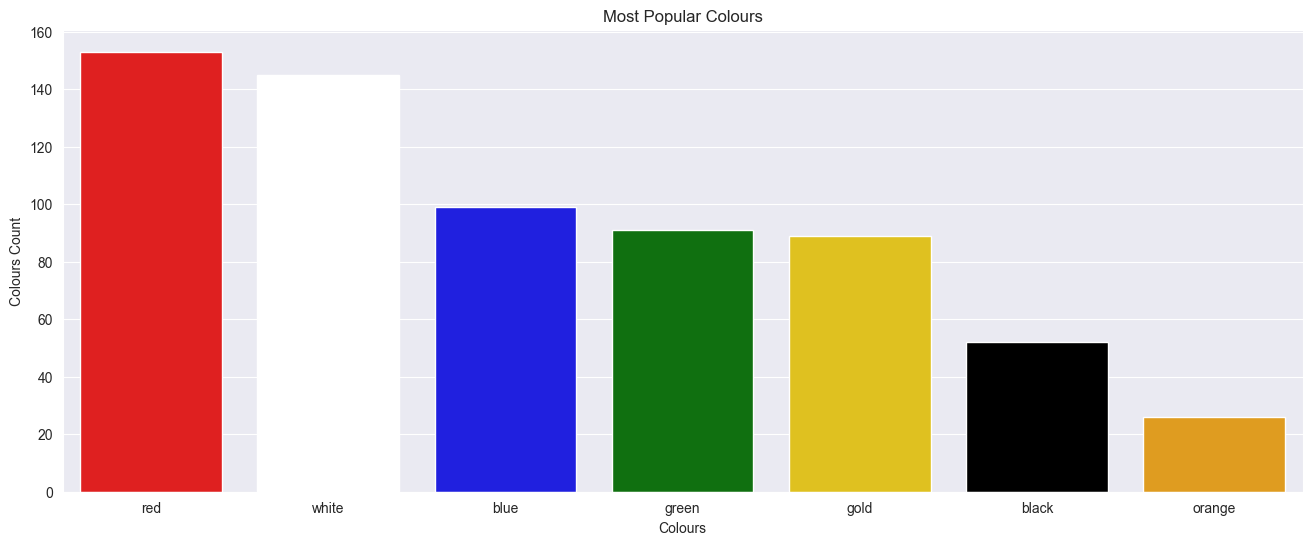

In [6]:
colours = ['blue', 'red', 'green', 'orange', 'gold', 'white', 'black']
all_colours_count = [df['blue'].sum(), df['red'].sum(), df['green'].sum() , df['orange'].sum(), df['gold'].sum(),  df['white'].sum() , df['black'].sum()]


colours_df = pd.DataFrame({'colours': colours, 'all_colours_count': all_colours_count})
colours_df.sort_values(by='all_colours_count', ascending=False, inplace=True)

plt.figure(figsize=(16, 6))
sns.barplot(data=colours_df,x='colours', y='all_colours_count',palette=colour_palette_mapping,hue='colours')
graphing_template('Most Popular Colours','Colours','Colours Count')

plt.show()

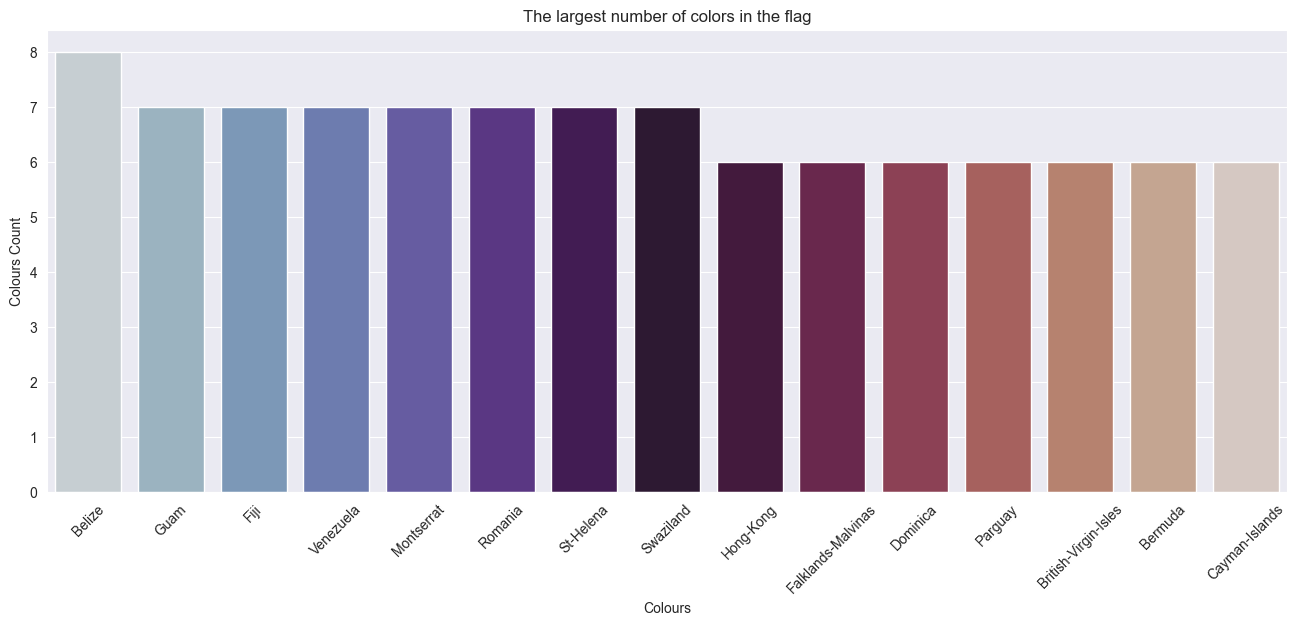

In [7]:
colours_count_by_country = df[['name','colours']].copy()

colours_count_by_country.sort_values(by='colours', ascending=False, inplace=True)   
colour_palette_mapping = {colour: colour for colour in df['colours'].unique()}

plt.figure(figsize=(16, 6))
sns.barplot(data=colours_count_by_country[:15],x='name', y='colours',palette="twilight",hue='name')
graphing_template('The largest number of colors in the flag','Colours','Colours Count',45)

plt.show()

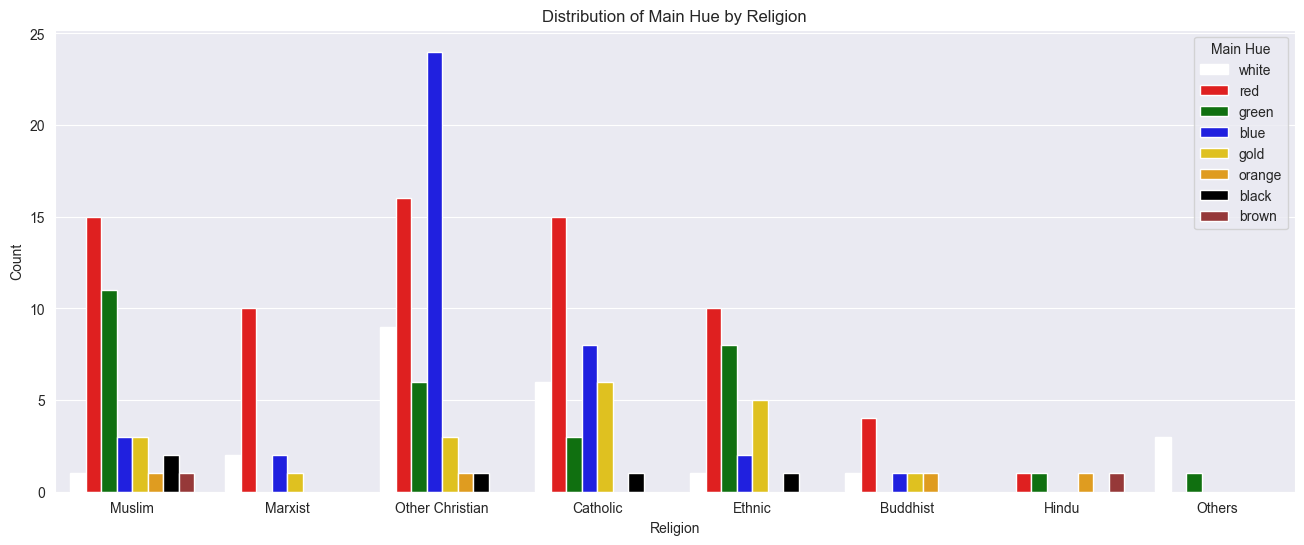

In [8]:
plt.figure(figsize=(16, 6))

color_pallate_map2 = dict(zip(df['mainhue'].unique(), df['mainhue'].unique()))

sns.countplot(data=df, x='religion_text', hue='mainhue',palette=color_pallate_map2)
graphing_template('Distribution of Main Hue by Religion', 'Religion', 'Count')
plt.legend(title='Main Hue')

plt.show()

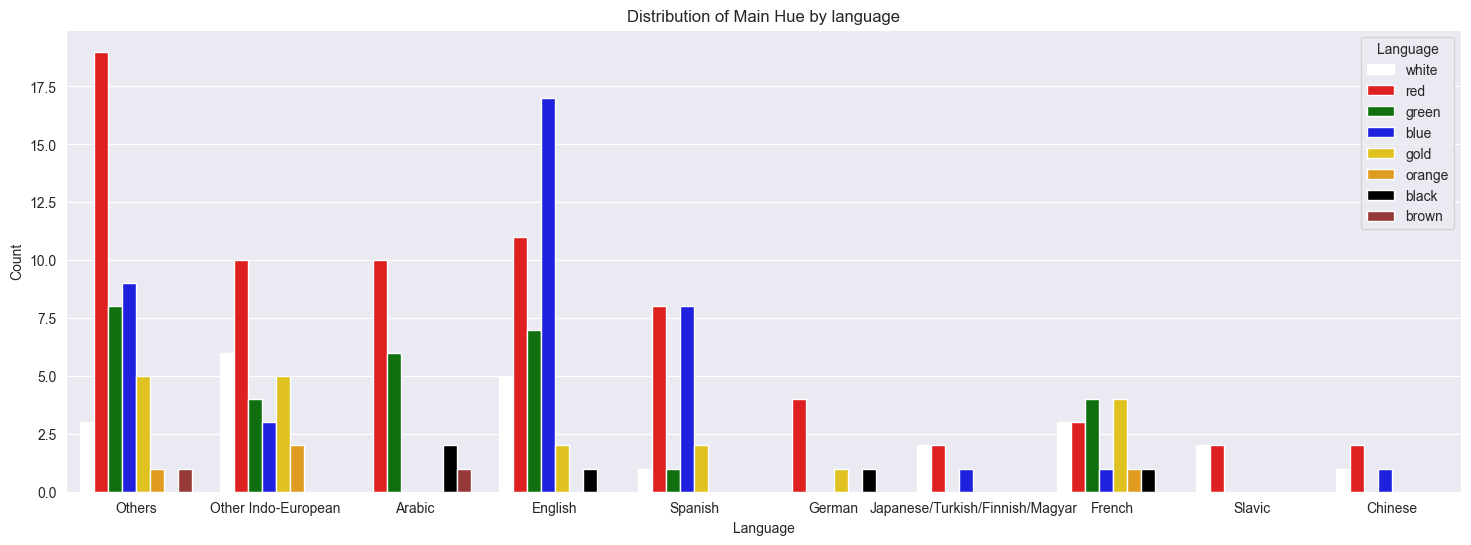

In [9]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='language_text', hue='mainhue', palette=color_pallate_map2)

graphing_template('Distribution of Main Hue by language','Language','Count')
plt.legend(title='Language')

plt.show()

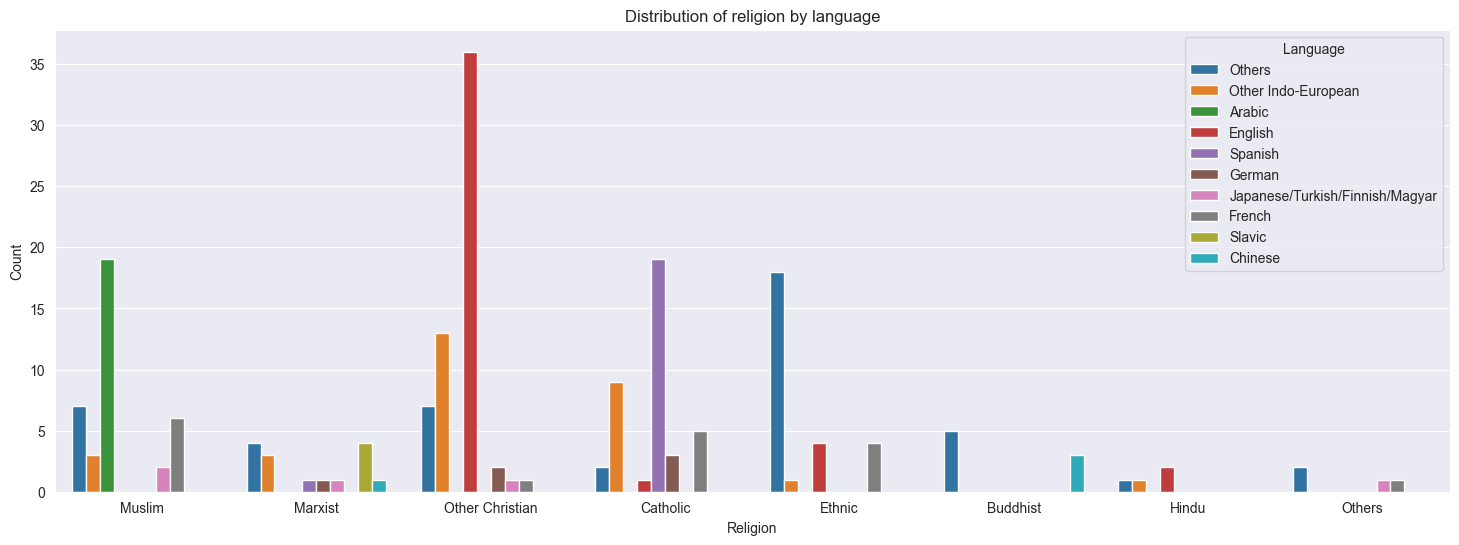

In [10]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='religion_text', hue='language_text')

graphing_template('Distribution of religion by language','Religion','Count')
plt.legend(title='Language')

plt.show()

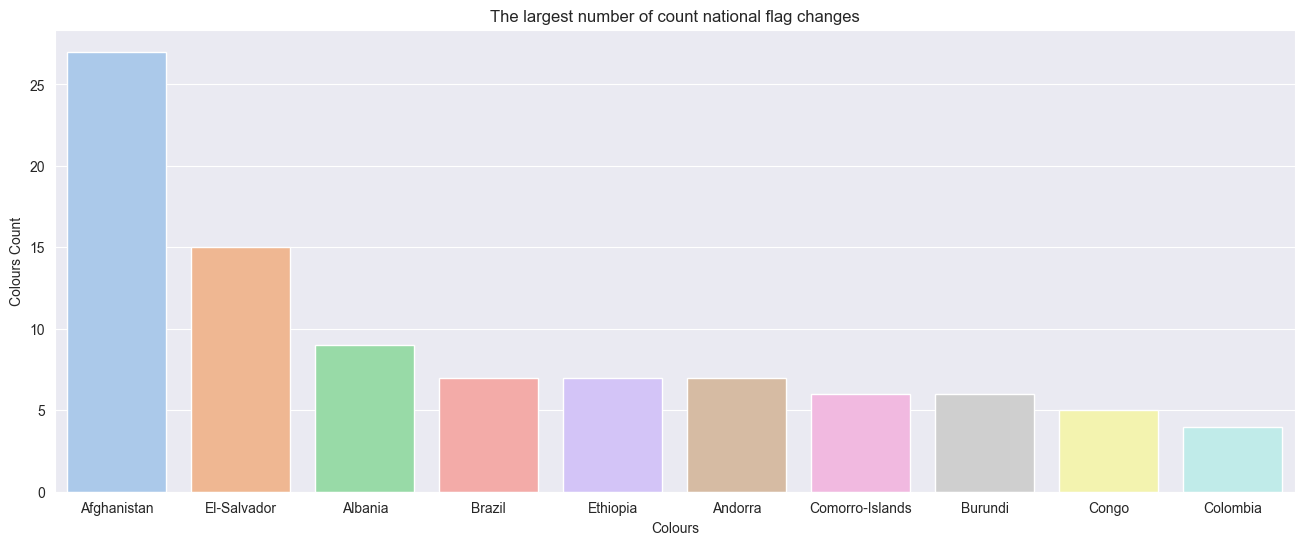

In [11]:
df_copy = df[['number of country national flag','name']].copy()
df_copy.sort_values(by=['number of country national flag'],ascending=False, inplace=True)

plt.figure(figsize=(16, 6))
sns.barplot(data=df_copy[:10],x='name', y='number of country national flag',palette="pastel",hue='name')
graphing_template('The largest number of count national flag changes','Colours','Colours Count')

plt.show()

<Axes: >

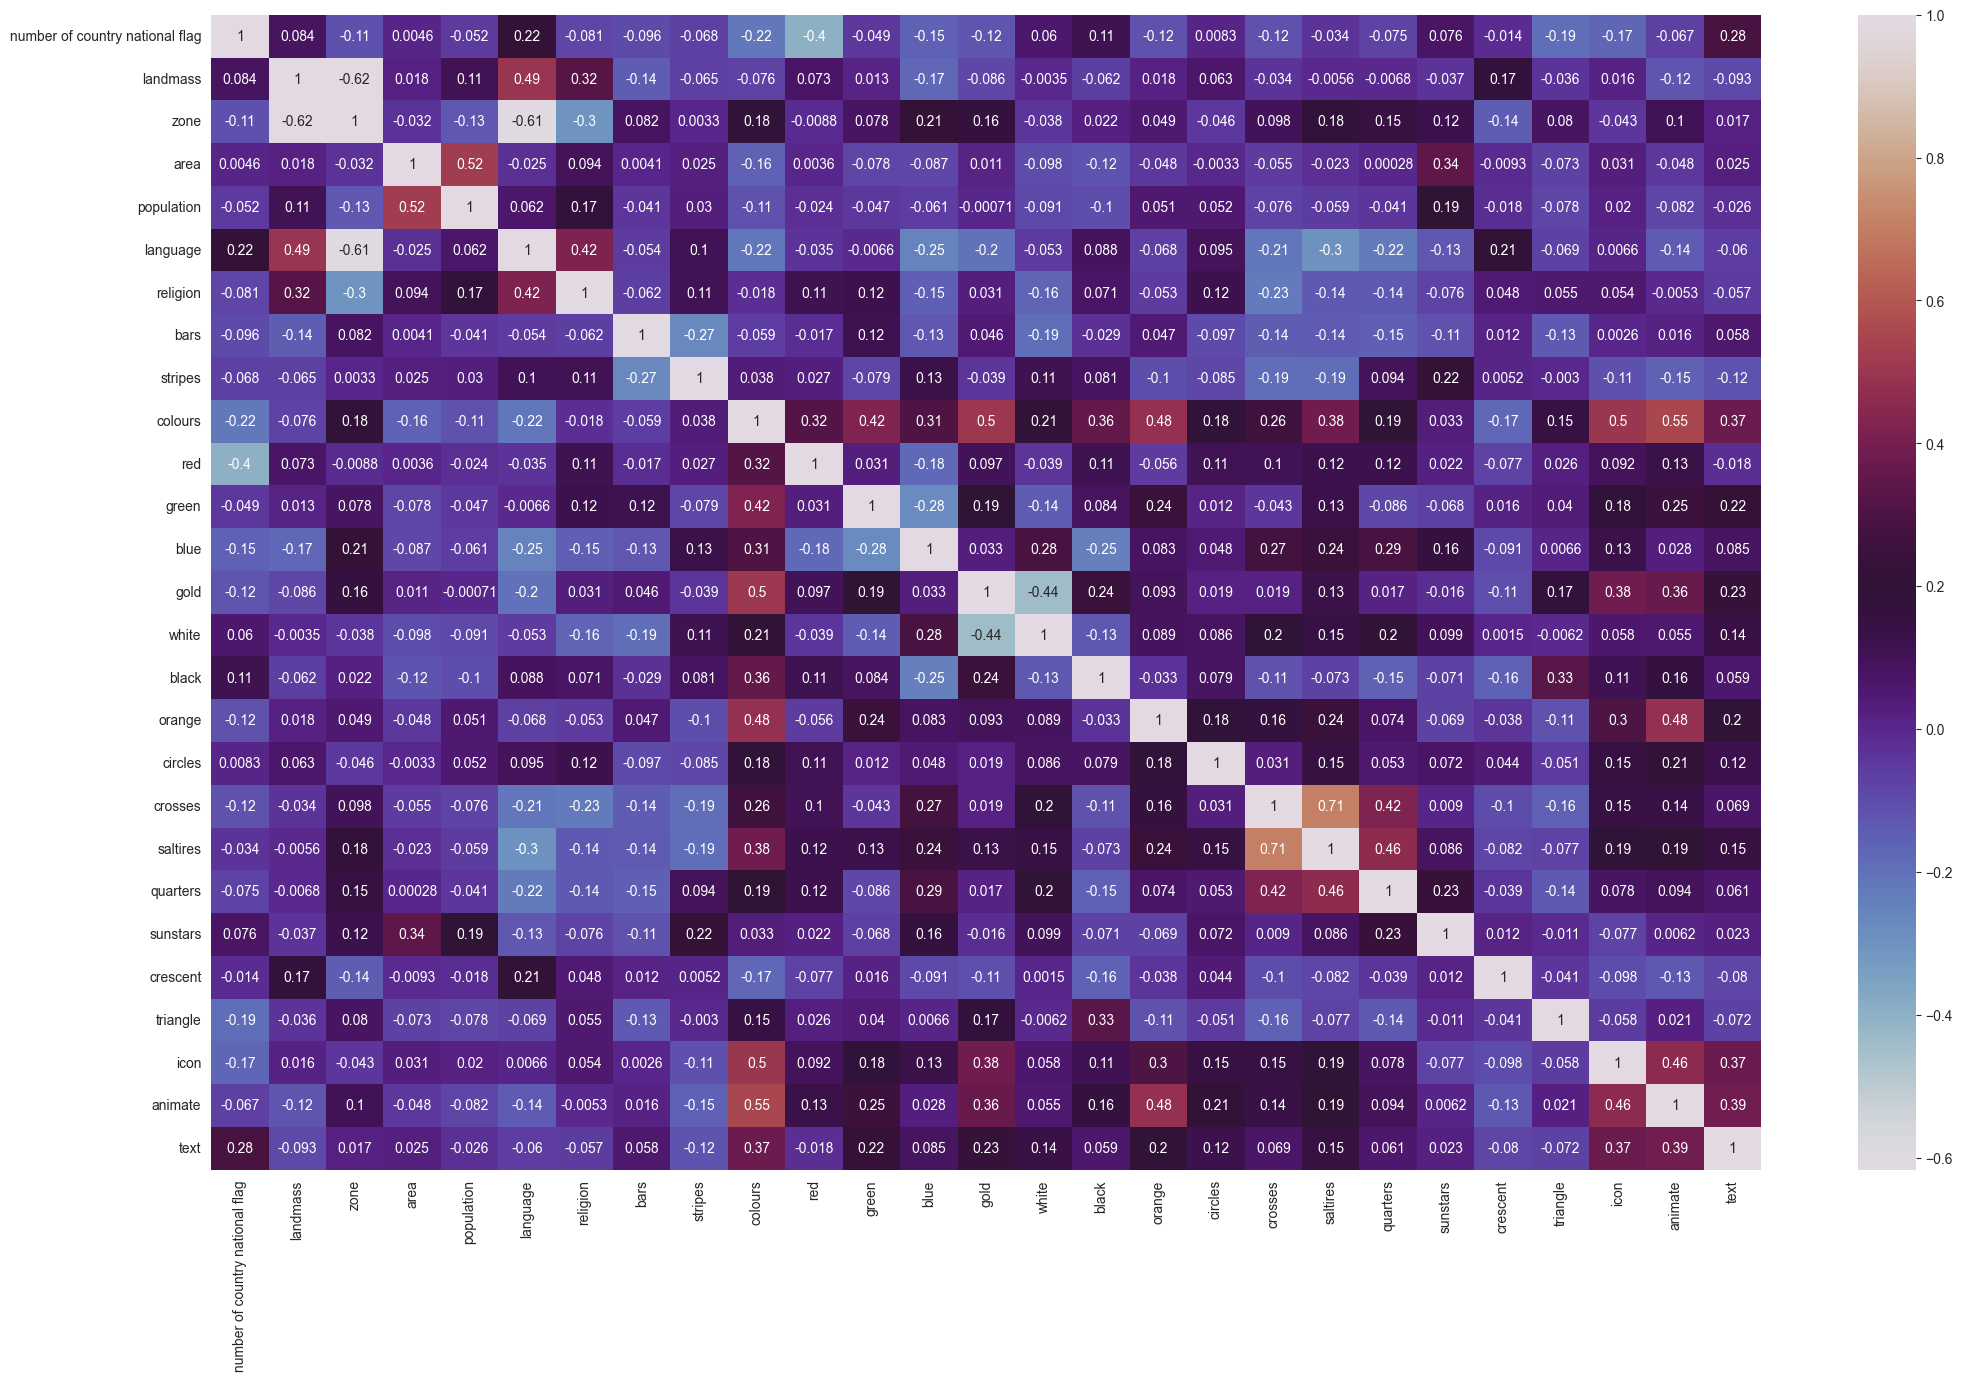

In [12]:
columns_to_exclude = ['name', 'image',  'topleft', 'botright','mainhue','language_text','religion_text','landmass_text']  
df_without_string_columns = df.drop(columns=columns_to_exclude)
corr = df_without_string_columns.corr(method='pearson')

fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            square=False,
            cmap= 'twilight',  
            annot=True) 

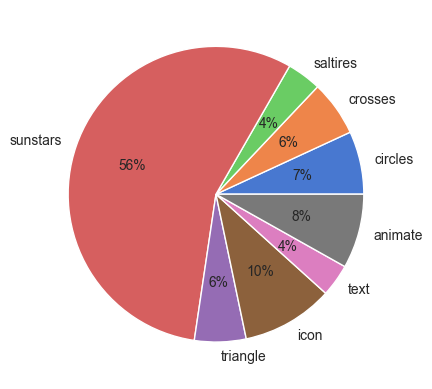

In [36]:
symbols_df = pd.DataFrame({
    'symbols_count': [df['circles'].sum(), df['crosses'].sum(), df['saltires'].sum(), df['sunstars'].sum(),df['triangle'].sum(), df['icon'].sum(),df['text'].sum(),df['animate'].sum()],
    'symbols_name': ['circles', 'crosses', 'saltires', 'sunstars','triangle','icon','text','animate']
})

plt.pie(symbols_df['symbols_count'], labels=symbols_df['symbols_name'], colors=sns.color_palette("muted"), autopct='%.0f%%')

plt.show() 

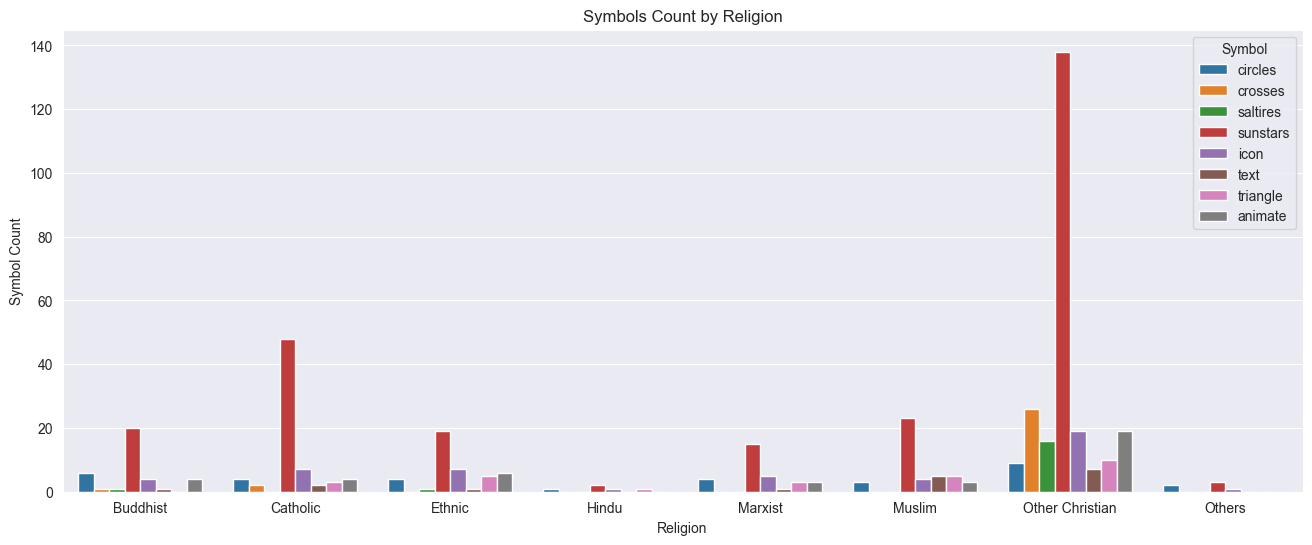

In [35]:
religion_symbols_df = df.groupby('religion_text')[['circles', 'crosses', 'saltires', 'sunstars','icon','text','triangle','animate']].sum().reset_index()
religion_symbols_df = religion_symbols_df.melt(id_vars='religion_text', var_name='symbol', value_name='count')

plt.figure(figsize=(16, 6))
sns.barplot(data=religion_symbols_df, x='religion_text', y='count', hue='symbol')

graphing_template('Symbols Count by Religion','Religion','Symbol Count')
plt.legend(title='Symbol')

plt.show()

The reason christians have the most stars is because they often designate states that way. 